In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
np.__version__  # if not 1.x run uv pip install --system numpy==1.26.4

'1.26.4'

In [3]:
import pathlib

data_path = pathlib.Path('../data/MELBOURNE_HOUSE_PRICES_LESS.csv')

data_path.is_file()

True

# EDA

## Loading data

In [4]:
housing = pd.read_csv(data_path)
housing.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [5]:
housing.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Postcode           int64
Regionname        object
Propertycount      int64
Distance         float64
CouncilArea       object
dtype: object

In [6]:
housing['Type'].unique()

array(['h', 't', 'u'], dtype=object)

## Checking out the median, mean and std

In [7]:
housing.describe()

,Rooms,Price,Postcode,Propertycount,Distance
count,63023.000000,4.843300e+04,63023.000000,63023.000000,63023.000000
mean,3.110595,9.978982e+05,3125.673897,7617.728131,12.684829
std,0.957551,5.934989e+05,125.626877,4424.423167,7.592015
min,1.000000,8.500000e+04,3000.000000,39.000000,0.000000
25%,3.000000,6.200000e+05,3056.000000,4380.000000,7.000000
50%,3.000000,8.300000e+05,3107.000000,6795.000000,11.400000
75%,4.000000,1.220000e+06,3163.000000,10412.000000,16.700000
max,31.000000,1.120000e+07,3980.000000,21650.000000,64.100000


## are there null values?

In [8]:
housing.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price            14590
Method               0
SellerG              0
Date                 0
Postcode             0
Regionname           0
Propertycount        0
Distance             0
CouncilArea          0
dtype: int64

In [9]:
shape_before = housing.shape
housing = housing[housing['Price'].notna()]
shape_before, housing.shape

((63023, 13), (48433, 13))

In [10]:
housing.describe()

,Rooms,Price,Postcode,Propertycount,Distance
count,48433.000000,4.843300e+04,48433.000000,48433.000000,48433.000000
mean,3.071666,9.978982e+05,3123.210332,7566.399913,12.702761
std,0.944708,5.934989e+05,125.534940,4457.405884,7.550030
min,1.000000,8.500000e+04,3000.000000,39.000000,0.000000
25%,2.000000,6.200000e+05,3051.000000,4280.000000,7.000000
50%,3.000000,8.300000e+05,3103.000000,6567.000000,11.700000
75%,4.000000,1.220000e+06,3163.000000,10412.000000,16.700000
max,31.000000,1.120000e+07,3980.000000,21650.000000,55.800000


## Spliting price into bins

/tmp/ipykernel_6844/2395519943.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=housing['PriceRange'], palette='Set2')


<Axes: xlabel='PriceRange', ylabel='Count'>

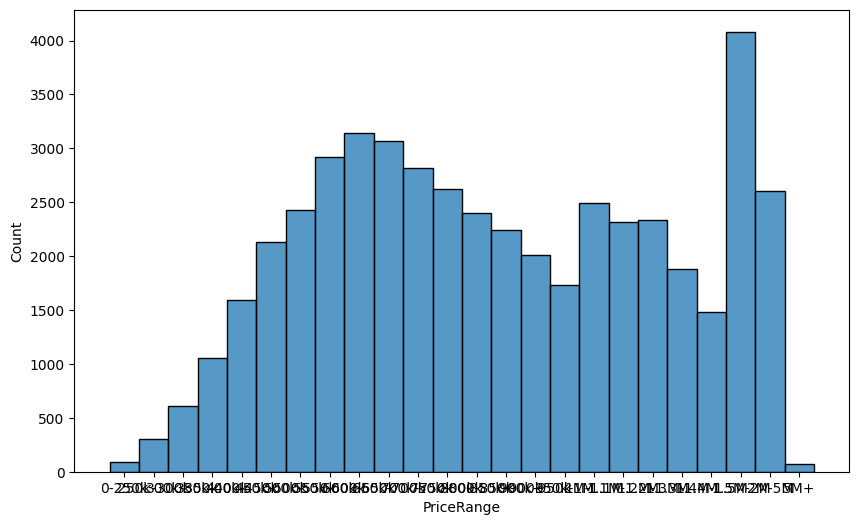

In [11]:
price_bins = [0, 250000, 300000, 350000, 400000, 450000, 500000, 550000, 600000, 650000, 700000, 750000, 800000, 850000, 900000, 950000, 1000000, 1100000, 1200000, 1300000, 1400000, 1500000, 2000000, 5000000, 11500000]
price_labels = ['0-250k', '250k-300k', '300k-350k', '350k-400k', '400k-450k', '450k-500k', '500k-550k', '550k-600k', '600k-650k', '650k-700k', '700k-750k', '750k-800k', '800k-850k', '850k-900k', '900k-950k', '950k-1M', '1M-1.1M', '1.1M-1.2M', '1.2M-1.3M', '1.3M-1.4M', '1.4M-1.5M', '1.5M-2M', '2M-5M', '5M+']

housing.loc[:, 'PriceRange'] = pd.cut(housing['Price'], bins=price_bins, labels=price_labels, include_lowest=True)
plt.figure(figsize=(10, 6))
sns.histplot(x=housing['PriceRange'], palette='Set2')

/tmp/ipykernel_6844/1693385112.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=housing['PriceRange'], palette='Set2')


<Axes: xlabel='PriceRange', ylabel='Count'>

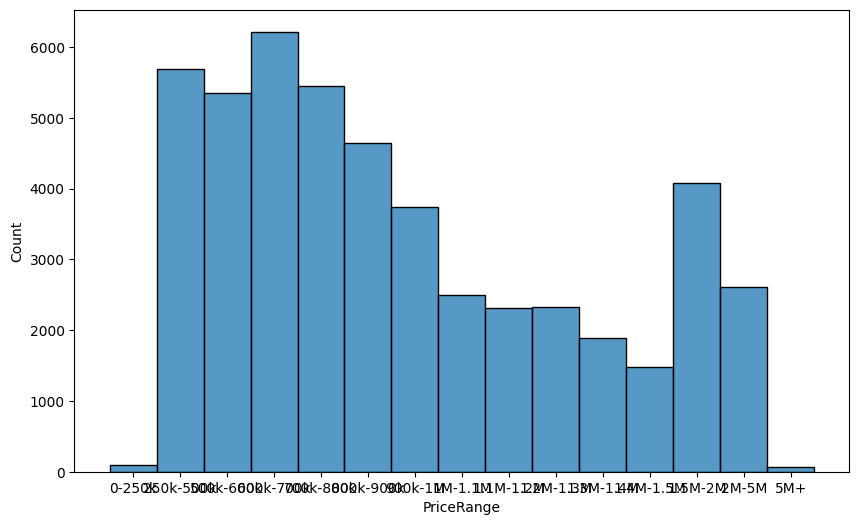

In [12]:
price_bins = [0, 250000, 500000, 600000, 700000, 800000, 900000, 1000000, 1100000, 1200000, 1300000, 1400000, 1500000, 2000000, 5000000, 11500000]
price_labels = ['0-250k', '250k-500k', '500k-600k', '600k-700k', '700k-800k', '800k-900k', '900k-1M', '1M-1.1M', '1.1M-1.2M', '1.2M-1.3M', '1.3M-1.4M', '1.4M-1.5M', '1.5M-2M', '2M-5M', '5M+']

housing.loc[:, 'PriceRange'] = pd.cut(housing['Price'], bins=price_bins, labels=price_labels, include_lowest=True)
plt.figure(figsize=(10, 6))
sns.histplot(x=housing['PriceRange'], palette='Set2')

<Axes: xlabel='Price', ylabel='Count'>

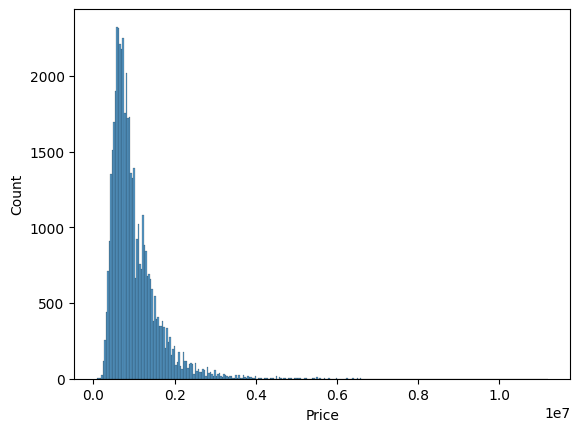

In [13]:
sns.histplot(housing['Price'], kde=False, bins=300)

/tmp/ipykernel_6844/3947139641.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(housing['Price'], shade=True)


<Axes: xlabel='Price', ylabel='Density'>

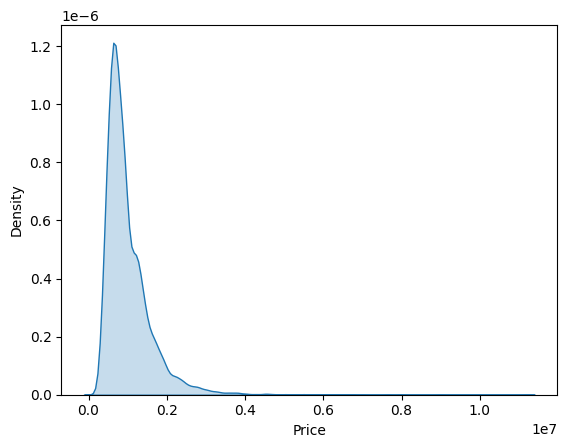

In [14]:
sns.kdeplot(housing['Price'], shade=True)

((array([-4.18415621, -3.97807007, -3.86570063, ...,  3.86570063,
          3.97807007,  4.18415621]),
  array([   85000.,   112000.,   112000., ...,  8000000.,  9000000.,
         11200000.])),
 (528802.9561435307, 997898.2414882412, 0.8909254964740269))

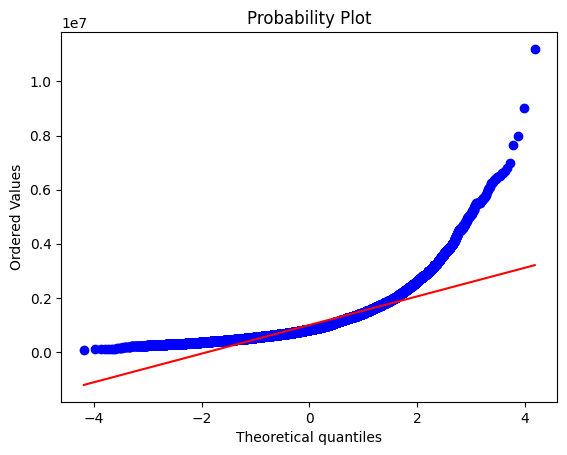

In [15]:
import scipy
scipy.stats.probplot(housing['Price'], dist="norm", plot=plt)

## Price Correlations

,Rooms,Price
Rooms,1.000000,0.412438
Price,0.412438,1.000000


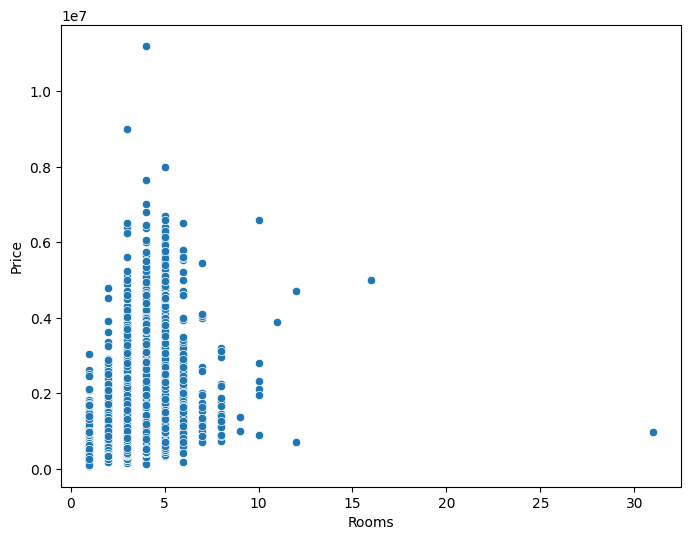

In [16]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=housing, x='Rooms', y='Price')
housing[['Rooms', 'Price']].corr()

## correlation between Price and Rooms is positive and suggest the following:
- the more rooms the house has the higher it's price would be. correlation is not that high, meaning it cannot be the key factor

,Distance,Price
Distance,1.000000,-0.253668
Price,-0.253668,1.000000


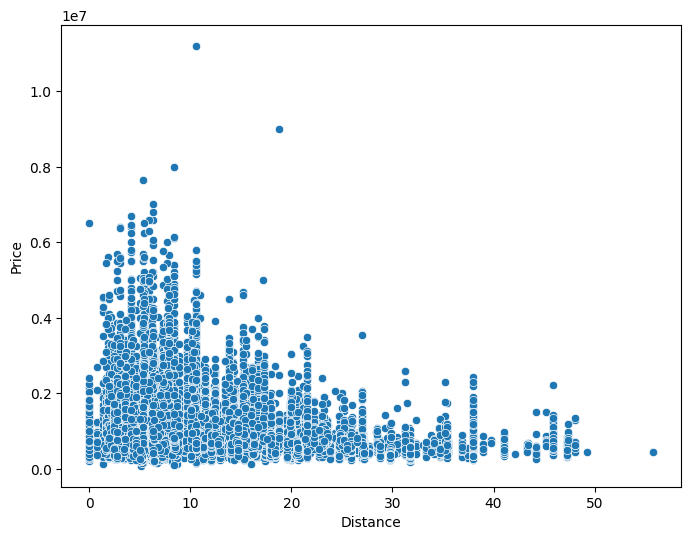

In [17]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=housing, x='Distance', y='Price')
housing[['Distance', 'Price']].corr()

## correlation between Price and Distance is negative and suggest the following:
- the further away the house is located the lower the price would be. the correlation is close to 0, meaning it cannot be the key factor contributing to the price

<Axes: xlabel='Regionname'>

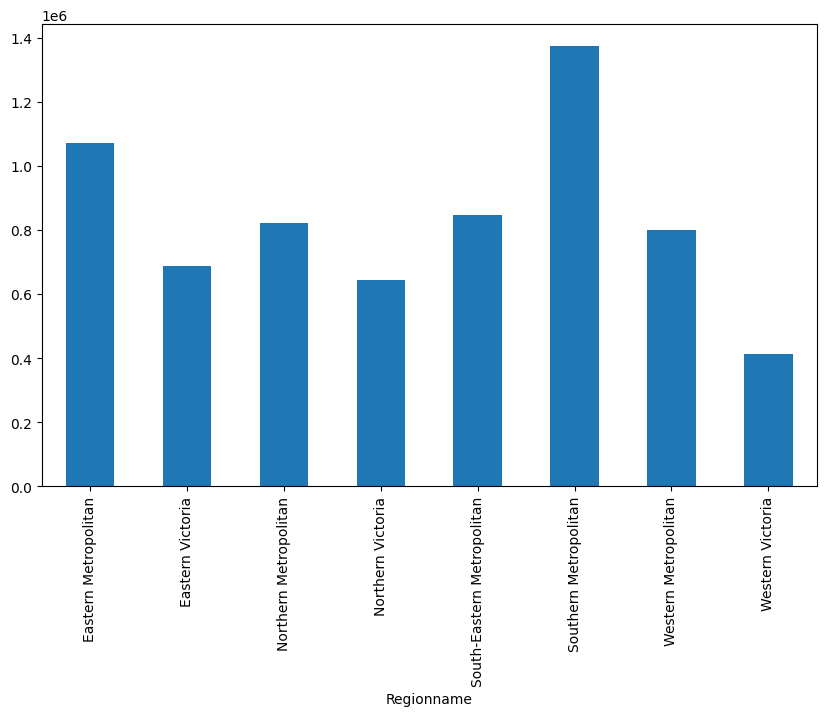

In [18]:
plt.figure(figsize=(10, 6))
housing.groupby('Regionname')['Price'].mean().plot(kind='bar')

### here we can see that Regions (their reputation, infrastructure & other factors) play high role in price distribution

In [19]:
mean_price_by_region = housing.groupby('Regionname')['Price'].mean().reset_index().sort_values(by='Price').reset_index(drop=True)
cheapest_region = mean_price_by_region.loc[mean_price_by_region['Price'].idxmin()]
most_expensive_region = mean_price_by_region.loc[mean_price_by_region['Price'].idxmax()]
print(cheapest_region)
most_expensive_region

Regionname    Western Victoria
Price            412026.098901
Name: 0, dtype: object


Regionname    Southern Metropolitan
Price                1373221.771297
Name: 7, dtype: object

### The most expensive region is Southern Metropolitan Region & the cheapest is Western Victoria

<Axes: >

<Figure size 1000x600 with 0 Axes>

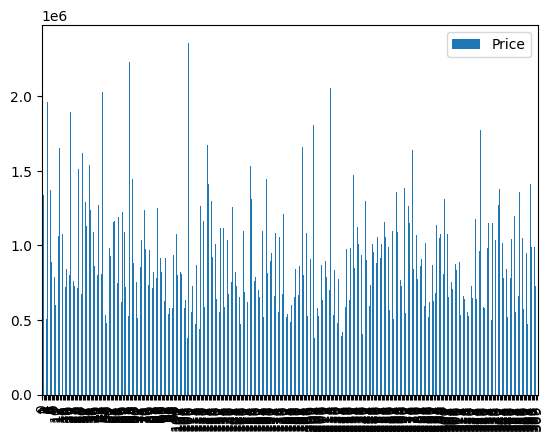

In [20]:
plt.figure(figsize=(10, 6))

mean_price_by_suburb = housing.groupby('Suburb')['Price'].mean().reset_index()
mean_price_by_suburb.plot(kind='bar')

In [21]:
cheapest_suburb = mean_price_by_suburb.loc[mean_price_by_suburb['Price'].idxmin()]
most_expensive_suburb = mean_price_by_suburb.loc[mean_price_by_suburb['Price'].idxmax()]
print(cheapest_suburb)
most_expensive_suburb

Suburb      Darley
Price     380000.0
Name: 108, dtype: object


Suburb          Deepdene
Price     2359805.555556
Name: 109, dtype: object

### The most expensive suburb is Deepdene & the cheapest is Darley

In [22]:
# checking correlation for combined Regionname & Distance

from sklearn.linear_model import LinearRegression

# X = housing[['Regionname', 'Distance']]  # has to be encoded
# X_encoded_by_price = housing[['Regionname_encoded', 'Distance']]
X = pd.get_dummies(housing[['Regionname', 'Distance']], drop_first=True)
y = housing['Price']
var_y = y.var()

reg_model = LinearRegression()
reg_model.fit(X, y)

coefficients = reg_model.coef_
intercept = reg_model.intercept_

r_squared = reg_model.score(X, y)

print(f'Intercept (Base Price): {intercept:,.2f} AUD')
print('Coefficients:')
print(f'- Regionname: {coefficients[0]:,.2f}')
print(f'- Distance: {coefficients[1]:,.2f}')
print(f'- Var: {var_y}')
print(f'- R-squared: {r_squared:.4f}')

Intercept (Base Price): 1,404,622.31 AUD
Coefficients:
- Regionname: -21,710.64
- Distance: 20,650.29
- Var: 352240966898.41614
- R-squared: 0.2084


## Correlation summary:

r-squared is 0.2 which means that Distance and Regionname contribute to just 20% of the price
it means that they do play role but there is no 100% impact on price
#### Meaning - 
Distance and Region together are not impactful on overall price of the house

## Sale analysis

### Q: is Price / Room ratio more important factor then Location (Regionname, Suburb, Distance) for sale count?

In [23]:
housing['PricePerRoom'] = housing['Price'] / housing['Rooms']
housing.head(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea,PriceRange,PricePerRoom
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council,1.4M-1.5M,496666.666667
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council,1.2M-1.3M,406666.666667
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council,1.4M-1.5M,473333.333333
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council,1.5M-2M,505000.000000
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council,600k-700k,335000.000000
5,Airport West,4/32 Earl St,2,t,530000.0,S,Jellis,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council,500k-600k,265000.000000
6,Airport West,3/74 Hawker St,2,u,540000.0,S,Barry,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council,500k-600k,270000.000000
7,Airport West,1/26 Highridge Cr,3,h,715000.0,SP,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council,700k-800k,238333.333333
9,Albert Park,18 Mills St,3,h,1925000.0,S,Cayzer,1/04/2017,3206,Southern Metropolitan,3280,3.0,Port Phillip City Council,1.5M-2M,641666.666667
10,Albion,3/15 Drummartin St,3,u,515000.0,S,Douglas,1/04/2017,3020,Western Metropolitan,2185,10.5,Brimbank City Council,500k-600k,171666.666667


In [24]:
housing_per_region = housing.groupby('Regionname').agg(
    total_sales=('Price', 'sum'),
    price_per_room=('PricePerRoom', 'mean')
).reset_index()

housing_per_region.head()

,Regionname,total_sales,price_per_room
0,Eastern Metropolitan,8.129887e+09,320692.126996
1,Eastern Victoria,2.578239e+08,200026.649554
2,Northern Metropolitan,1.120094e+10,300452.746556
3,Northern Victoria,2.926024e+08,185271.438095
4,South-Eastern Metropolitan,3.393403e+09,266524.693596


In [25]:
housing_per_region['total_sales'].corr(housing_per_region['price_per_room'])

0.9413176053308762

In [26]:
X = housing_per_region['price_per_room'].values.reshape(-1, 1)
y = housing_per_region['total_sales'].values

model = LinearRegression()
model.fit(X, y)

model.score(X, y)

0.886078834105855

## The correlation is really high. We can confidently say that this ratio has not just correlation, but also a causation for amount of prices in each region